In [209]:
# installing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
df = pd.read_csv("D:\\Projects\\project_datasets\\google_paly_store_dataset\\google_play_store_cleaned_data.csv")

In [211]:
df.head()

,App Name,Category,Rating,Reviews,Installs,Free,Price,Developer Id,Content Rating,Editors Choice,Ad Supported,Released,Size_MB
0,Gakondo,Adventure,0.0,0,15,True,0.0,Jean Confident Irénée NIYIZIBYOSE,Everyone,False,False,2020,10.0
1,Ampere Battery Info,Tools,4.4,64,7662,True,0.0,Webserveis,Everyone,False,True,2020,2.9
2,Vibook,Productivity,0.0,0,58,True,0.0,Cabin Crew,Everyone,False,False,2019,3.7
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5,19,True,0.0,Climate Smart Tech2,Everyone,False,True,2018,1.8
4,GROW.me,Tools,0.0,0,478,True,0.0,Rafal Milek-Horodyski,Everyone,False,False,2020,6.2


####

## Data Visualization

In [212]:
df.describe()

,Rating,Reviews,Installs,Price,Released,Size_MB
count,2.312743e+06,2.312743e+06,2.312743e+06,2.312743e+06,2.312743e+06,2.237953e+06
mean,2.209983e+00,2.836801e+03,3.202287e+05,1.035071e-01,2.018226e+03,1.920164e+01
std,2.096992e+00,2.111198e+05,2.355598e+07,2.633240e+00,2.136423e+00,2.388617e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,3.125000e-03
25%,0.000000e+00,0.000000e+00,8.400000e+01,0.000000e+00,2.017000e+03,4.900000e+00
50%,2.900000e+00,6.000000e+00,6.950000e+02,0.000000e+00,2.019000e+03,1.000000e+01
75%,4.300000e+00,4.100000e+01,7.355000e+03,0.000000e+00,2.020000e+03,2.500000e+01
max,5.000000e+00,1.385576e+08,1.205763e+10,4.000000e+02,2.021000e+03,1.020000e+03


#### Correlation between Numerical variables 

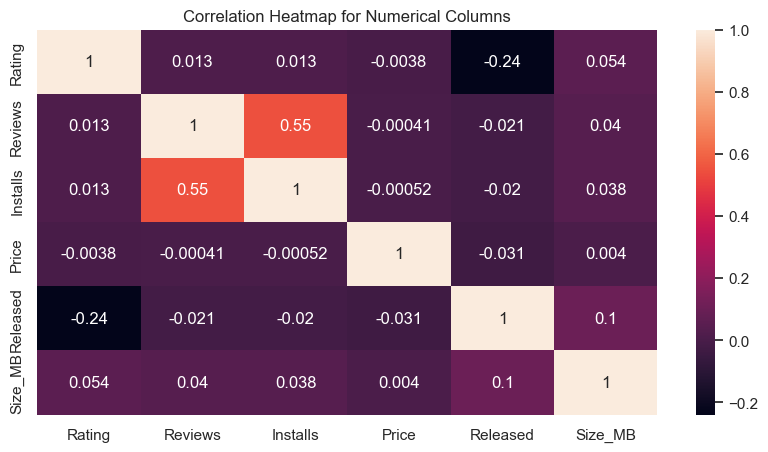

In [213]:
# Filter out only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
plt.figure(figsize=(10, 5))
corr = numerical_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

- Reviews and Install colummn has high correlation compared to others

####

#### App Category Distribution

In [214]:
category_counts = df['Category'].value_counts()

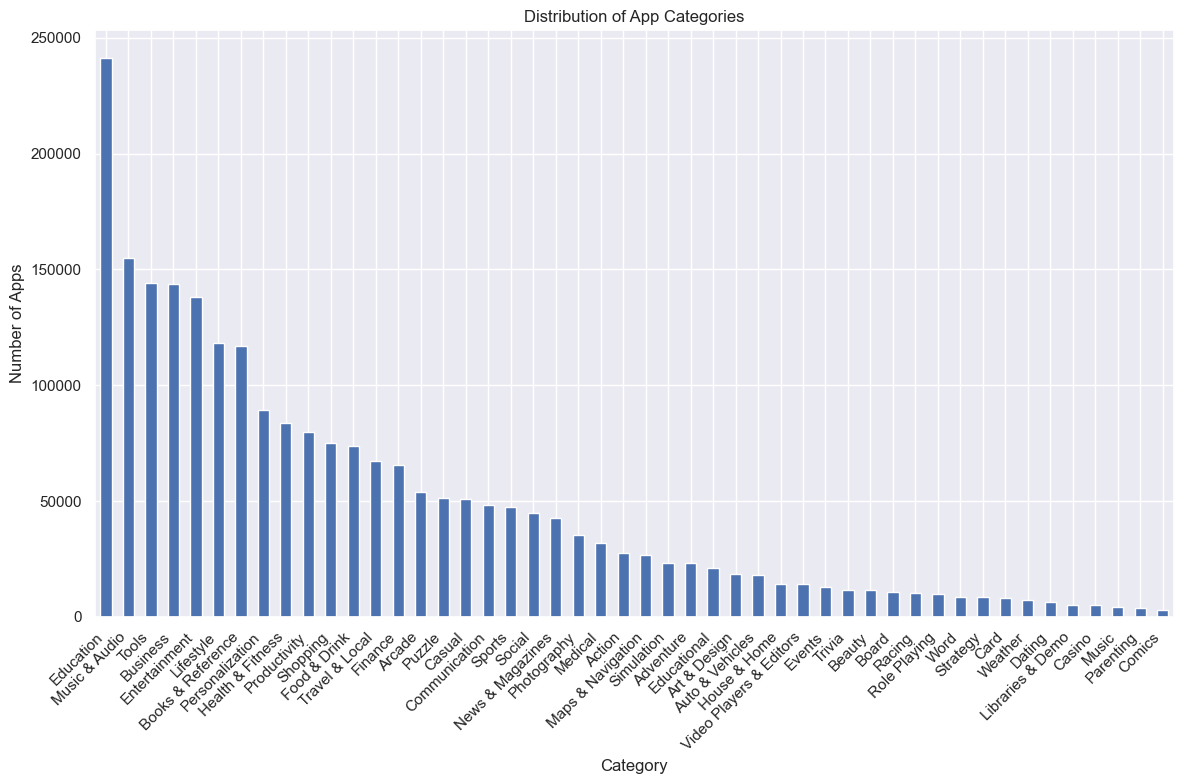

In [215]:
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotating X-Axis category names
plt.tight_layout()
plt.show()

- Education, Music & Audio, and Tools are the top three categories on the Google Play Store.
- Categories like Business, Entertainment, and Lifestyle also have significant representation.
- Developers should consider these popular categories for app development for user demand effectively.




####

#### Rating Distribution

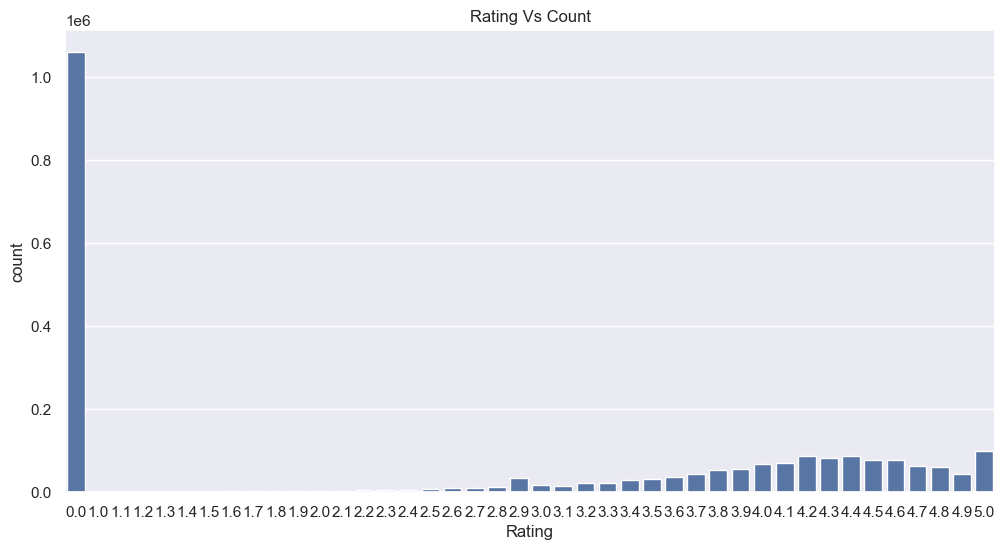

In [216]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("Rating Vs Count")
ax = sns.countplot(x="Rating", data=df)

- As you can see, rating categories 0.0, 5.0, 4.2, 4.3, and 4.4 are the top ratings in the dataset.
- 
The rating category 0.0 represents apps that have not been given any rating or are new to the marke
- As per my knowlwdge and  experience, most of the apps rating are between 3.7 to 4.3t.

####

#### Top Reviewed Apps by Category

In [217]:
category_reviews = df.groupby('Category')['Reviews'].sum().reset_index()

In [218]:
category_reviews = category_reviews.sort_values(by='Reviews', ascending=False)

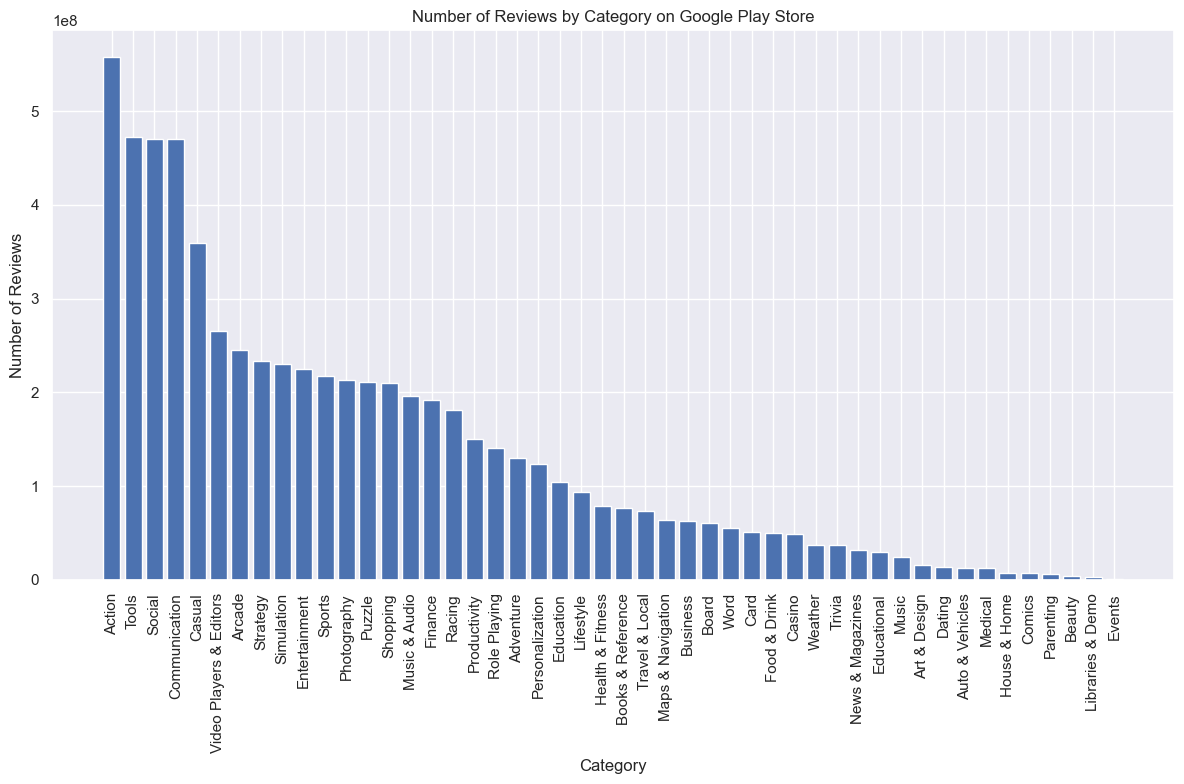

In [219]:
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(category_reviews['Category'], category_reviews['Reviews'])
plt.xlabel('Category')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Category on Google Play Store')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

As you can see, Action, Tools, Social, Communication, and Casual are the categories with the highest number of reviews and ratings from users.

####

#### Installs by Category 

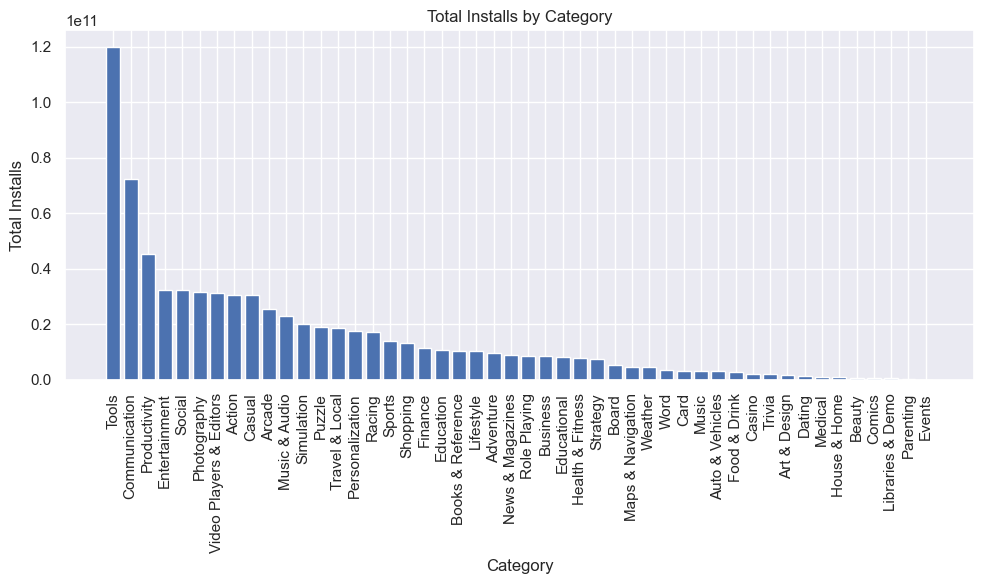

In [220]:
categorywise_installed_apps = df.groupby(['Category'])[['Installs']].sum().sort_values(by = 'Installs', ascending = False)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categorywise_installed_apps.index, categorywise_installed_apps['Installs'])
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs by Category')
plt.xticks(rotation=90)
plt.tight_layout()

Tools, Communication, Productivity, Social, and Entertainment categories have the most number of installs.

In [221]:
# Most Number of Install by apps (Top 10)

top10_installed_apps = df.groupby(['App Name'])[['Installs']].sum().sort_values(by = 'Installs', ascending = False)
top10_installed_apps[0:10]

,Installs
App Name,
Google Play services,12057627016
YouTube,9766230924
Google,9154248491
Google Maps - Navigate & Explore,9141671889
Google Text-to-Speech,9034404884
Google Chrome: Fast & Secure,8925640788
Gmail,8756574289
Android Accessibility Suite,7408134567
Google Drive,7028265259


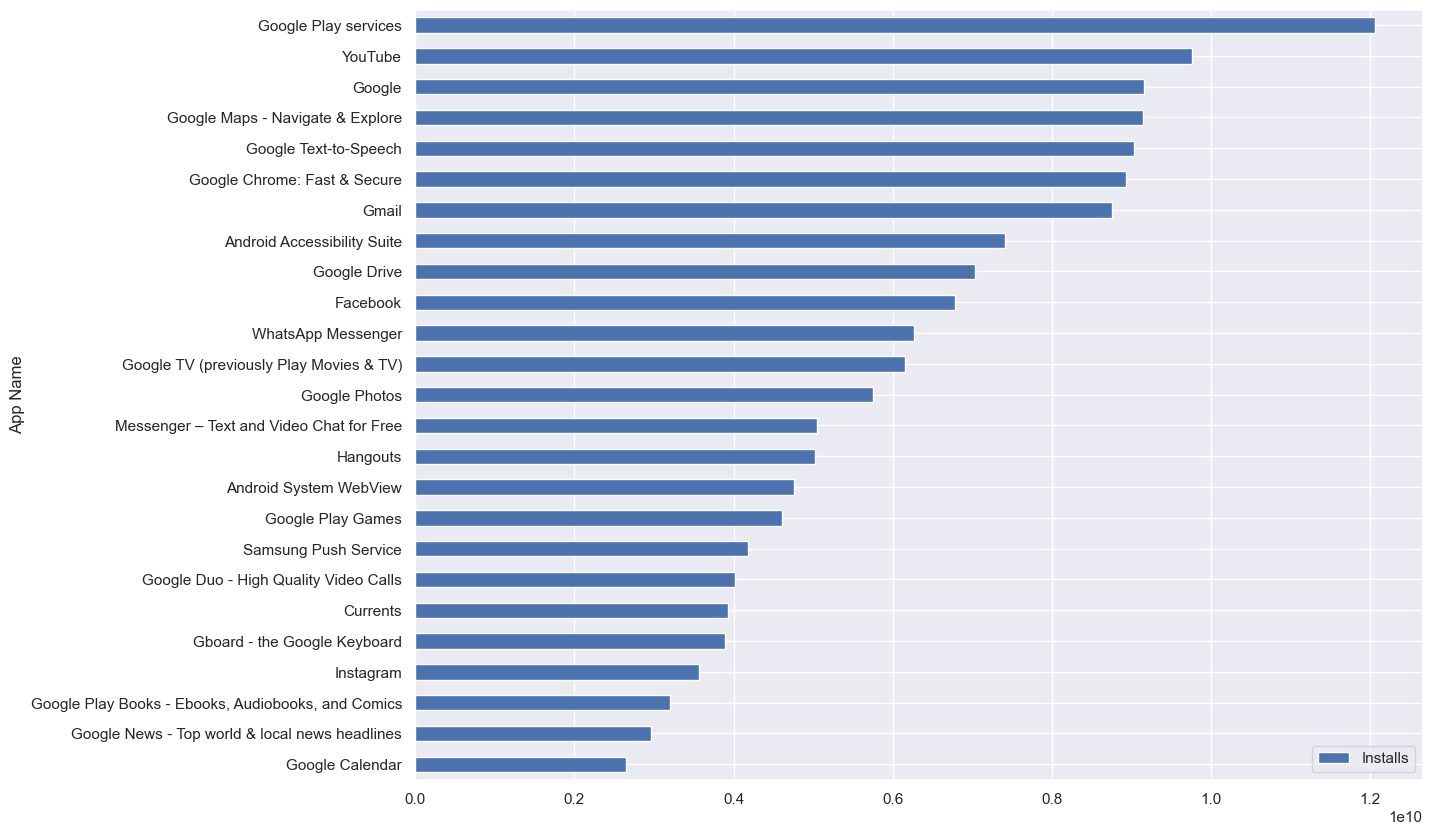

In [222]:
top10_installed_apps[0:25].plot(kind = 'barh', figsize=(13, 10)).invert_yaxis()

####

#### Intalls and Reviews Relationship

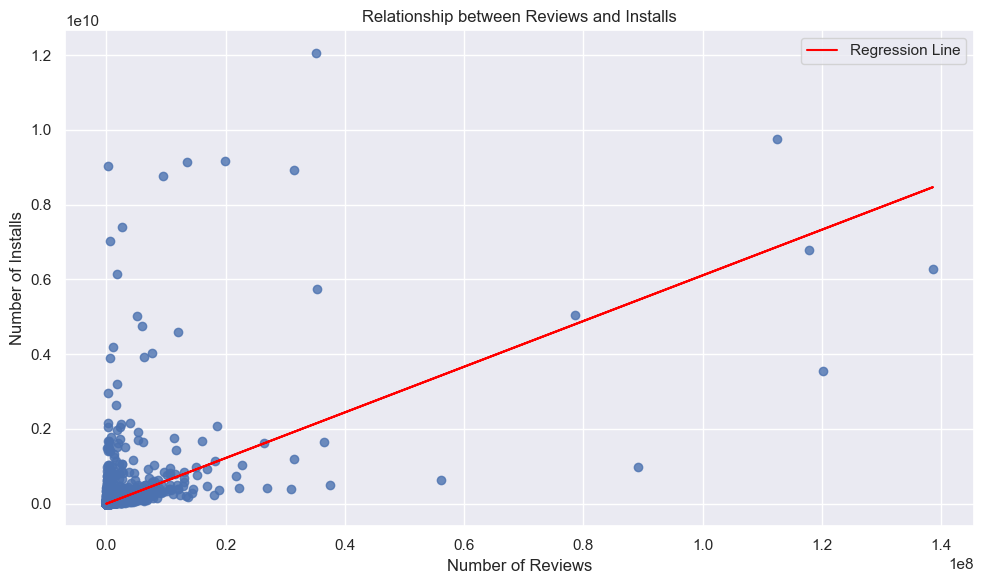

In [223]:
# Create scatter plot
from scipy import stats

plt.figure(figsize=(10, 6))
plt.scatter(df['Reviews'], df['Installs'], alpha=0.8)

# Calculate regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Reviews'], df['Installs'])
regression_line = slope * df['Reviews'] + intercept
plt.plot(df['Reviews'], regression_line, color='red', label='Regression Line')

plt.title('Relationship between Reviews and Installs')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

As you can see a pattern in the figure, there is a positive correlation between the Installs and Reviews columns. When the number of reviews increases, the number of installs also increases.

#### 

In [224]:
average_size_by_category = df.groupby('Category')['Size_MB'].mean().reset_index()
average_size_by_category[:5]

,Category,Size_MB
0,Action,42.112178
1,Adventure,36.797393
2,Arcade,26.873677
3,Art & Design,15.569112
4,Auto & Vehicles,17.916531


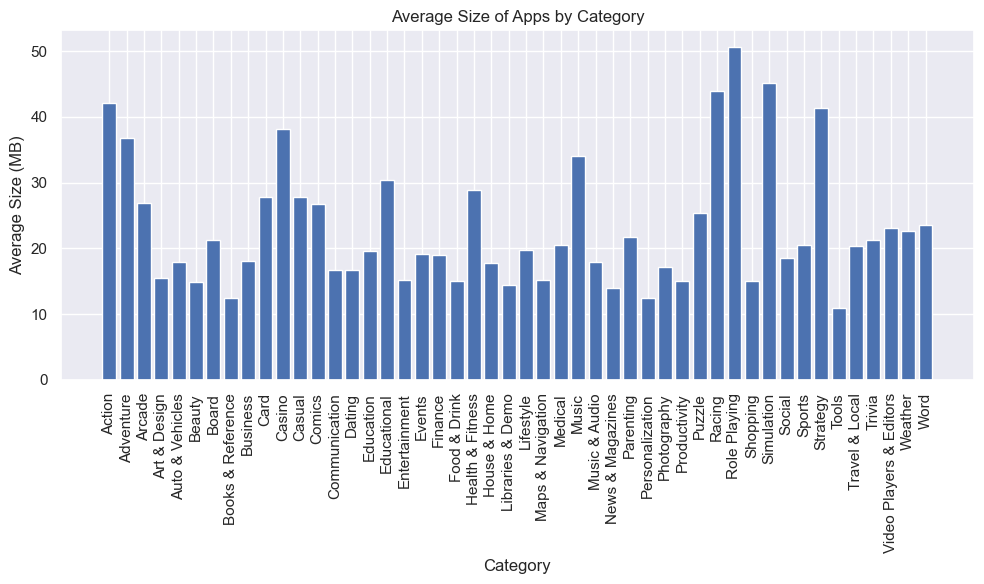

In [225]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_size_by_category['Category'], average_size_by_category['Size_MB'])
plt.xlabel('Category')
plt.ylabel('Average Size (MB)')
plt.title('Average Size of Apps by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### Free vs Paid Apps

In [226]:
df["Free"].value_counts()

Free
True     2267677
False      45066
Name: count, dtype: int64

In [227]:
df_type = df[['Rating','Free', 'Reviews']]
df_type

,Rating,Free,Reviews
0,0.0,True,0
1,4.4,True,64
2,0.0,True,0
3,5.0,True,5
4,0.0,True,0
...,...,...,...
2312738,0.0,True,0
2312739,0.0,True,0
2312740,3.5,True,8
2312741,5.0,True,12


In [228]:
p_mean = df_type.loc[df_type['Free'] == False, 'Rating'].mean()
print(f"Average Rating of Paid Apps = {p_mean}")

Average Rating of Paid Apps = 2.366136333377713


In [229]:
p_mean = df_type.loc[df_type['Free'] == True, 'Rating'].mean()
print(f"Average Rating of Paid Apps = {p_mean}")

Average Rating of Paid Apps = 2.20688016856016


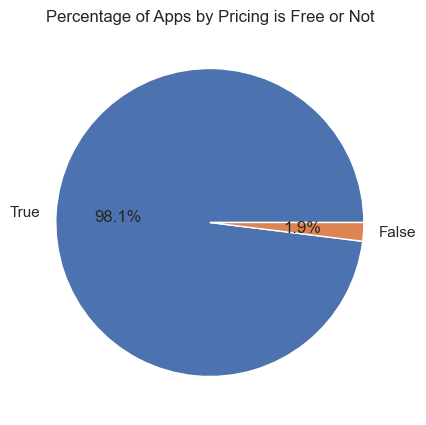

In [230]:
number_of_apps = df["Free"].value_counts()

sizes = number_of_apps.values
labels = number_of_apps.index

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Percentage of Apps by Pricing is Free or Not')

plt.show()

####

#### Number of Apps by Content Rating

In [231]:
number_of_apps_content_rating = df["Content Rating"].value_counts()
number_of_apps_content_rating

Content Rating
Everyone           2021923
Teen                196349
Mature 17+           60283
Everyone 10+         33898
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

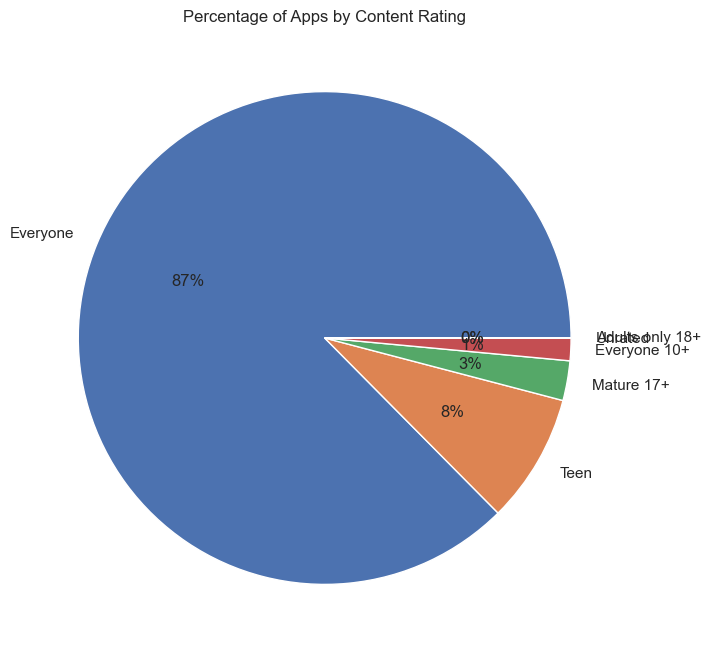

In [232]:
sizes = number_of_apps_content_rating.values
labels = number_of_apps_content_rating.index

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%.0f%%', radius=1)

plt.title('Percentage of Apps by Content Rating')

plt.show()

####

#### Number of Apps with Editors Choice Tag

In [ ]:
number_of_apps_editor_choice = df["Editors Choice"].value_counts()
number_of_apps_editor_choice

Close to 100% apps are Editor choice

####

#### Ad Supported

In [ ]:
number_of_apps_ad_support = df["Ad Supported"].value_counts()
number_of_apps_ad_support

In [ ]:
sizes = number_of_apps_ad_support.values
labels = number_of_apps_ad_support.index

plt.figure(figsize=(4, 3))
plt.pie(sizes, labels=labels, autopct='%.0f%%', radius=1)

plt.title('Percentage of Apps by Ad Support or Not')

plt.show()

About 50% apps supports ads and 50% apps does not support ads